## Viewing Results

In [8]:
import os
import scanpy as sc

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

In [9]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

In [10]:
sc.set_figure_params(dpi=200)

In [11]:
path_to_save = "./results/alzPro-time/"
sc.settings.figdir = path_to_save

In [12]:
combination = 'U'
normalized = True
specific_cell_type = "all"

In [13]:
conditions = ["3m", "6m", "9m"]
source_condition = "6m"
target_condition = "9m"
cell_type_key = "Group"
condition_key = "Timepoint"

In [14]:
adata = sc.read(f"./data/alzPro_{'normalized' if normalized else 'count'}_{combination}.h5ad")
#adata.uns['log1p']["base"] = None
adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [15]:
adata.X.min(), adata.X.max()

(0.0, 55.11332)

In [16]:
if specific_cell_type != 'all':
    cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
else:
    cell_type_adata = adata
#cell_type_adata.uns['log1p']["base"] = None
cell_type_adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [17]:
cell_type_adata.X[0][1550]

0.076606765

In [18]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == source_condition]
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [19]:
ctrl_adata.obs['method'] = source_condition
real_adata.obs['method'] = target_condition

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [20]:
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro-time/{specific_cell_type}_{'norm' if normalized else 'count'}_{combination}.h5ad")
#trvae_reconstructed.uns['log1p']["base"] = None
trvae_reconstructed

AnnData object with n_obs × n_vars = 32 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [21]:
trvae_reconstructed.X[0][1550]

0.0

In [22]:
trvae_reconstructed.X[:8].min(), trvae_reconstructed.X[:8].max()

(0.0, 30.355385)

In [23]:
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
16-0,2997,M,all,6m_to_9m,Test,0
17-0,2998,M,all,6m_to_9m,Train,0
18-0,3003,F,all,6m_to_9m,Test,0
19-0,3011,F,all,6m_to_9m,Test,0
20-0,3012,F,all,6m_to_9m,Train,0
21-0,3013,F,all,6m_to_9m,Train,0
22-0,3121,M,all,6m_to_9m,Train,0
23-0,3177,F,all,6m_to_9m,Train,0
24-0,3325,M,all,6m_to_9m,Train,0
25-0,3392,M,all,6m_to_9m,Test,0


In [24]:
trvae_pred = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"{source_condition}_to_{target_condition}"]
trvae_pred.var = ctrl_adata.var
trvae_pred.obs['method'] = 'trVAE'

In [25]:
trvae_pred.obs

,Qi ID,sex,Group,Timepoint,Validation,batch,method
16-0,2997,M,all,6m_to_9m,Test,0,trVAE
17-0,2998,M,all,6m_to_9m,Train,0,trVAE
18-0,3003,F,all,6m_to_9m,Test,0,trVAE
19-0,3011,F,all,6m_to_9m,Test,0,trVAE
20-0,3012,F,all,6m_to_9m,Train,0,trVAE
21-0,3013,F,all,6m_to_9m,Train,0,trVAE
22-0,3121,M,all,6m_to_9m,Train,0,trVAE
23-0,3177,F,all,6m_to_9m,Train,0,trVAE
24-0,3325,M,all,6m_to_9m,Train,0,trVAE
25-0,3392,M,all,6m_to_9m,Test,0,trVAE


In [26]:
models = ctrl_adata.concatenate(real_adata, trvae_pred)
models.obs['method'].unique()

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


array(['6m', '9m', 'trVAE'], dtype=object)

In [27]:
models.var_names

Index(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', 'A2A7S8|K1522',
       'A2A8L1|CHD5', 'A2A8L5|PTPRF', 'A2ADY9|DDI2', 'A2AG50|MA7D2',
       'A2AGT5|CKAP5', 'A2AJA9|AJM1',
       ...
       'Q9Z2U0|PSA7', 'Q9Z2U1|PSA5', 'Q9Z2U2|ZN292', 'Q9Z2V5|HDAC6',
       'Q9Z2W0|DNPEP', 'Q9Z2W8|GRIA4', 'Q9Z2W9|GRIA3', 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'],
      dtype='object', name='Accession', length=2969)

In [28]:
sc.tl.rank_genes_groups(models, reference=target_condition, 
                       groupby="method", groups=['trVAE'],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(models, reference='trVAE',
                         groupby="method", groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = models.uns['up_reg_genes']['names']['trVAE']
down_genes = models.uns['down_reg_genes']['names'][target_condition]

In [29]:
models.obs

,Qi ID,sex,Group,Timepoint,Validation,method,batch
16-0,2997,M,HET,6m,Test,6m,0
17-0,2998,M,HET,6m,Train,6m,0
18-0,3003,F,WT,6m,Test,6m,0
19-0,3011,F,HET,6m,Test,6m,0
20-0,3012,F,HET,6m,Train,6m,0
21-0,3013,F,HET,6m,Train,6m,0
22-0,3121,M,HET,6m,Train,6m,0
23-0,3177,F,HET,6m,Train,6m,0
24-0,3325,M,HET,6m,Train,6m,0
25-0,3392,M,WT,6m,Test,6m,0


In [30]:
protein_up = up_genes[0]
print(protein_up)

Q99PJ0|NTRI


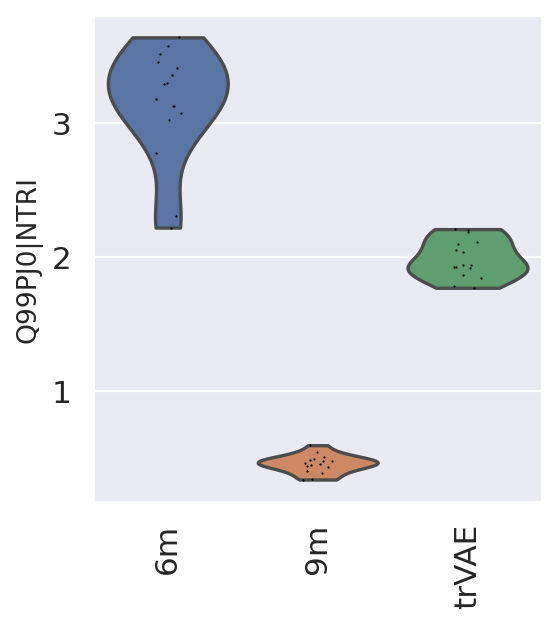

In [31]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_best_model_cmpr.pdf",
             jitter=True,
            )

In [32]:
protein_down = down_genes[0]
print(protein_down)

P67871|CSK2B


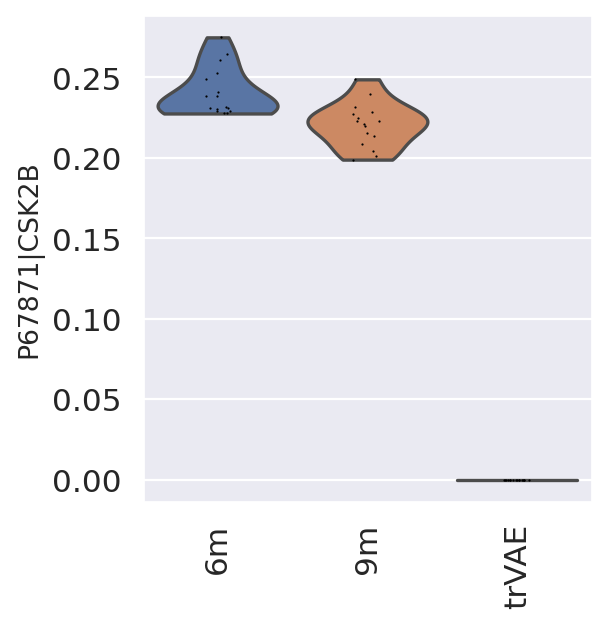

In [33]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_worst_model_cmpr.pdf",
             jitter=True,
            )

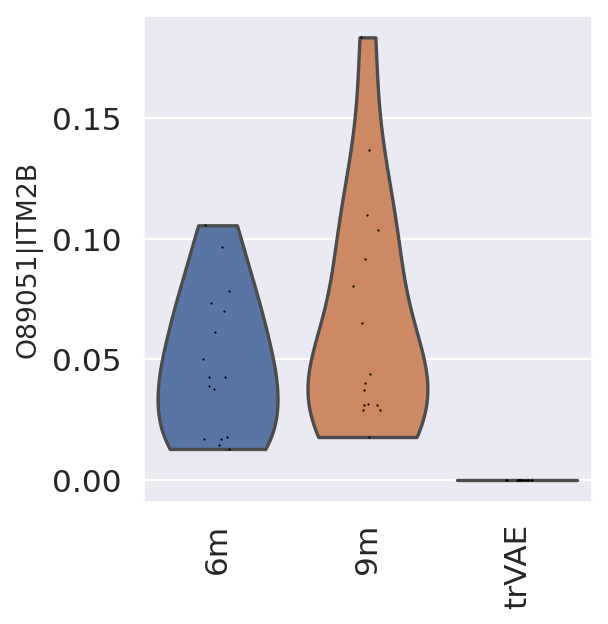

In [34]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="O89051|ITM2B", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_model_cmpr.pdf",
             jitter=True,
            )

### R^2 Plots

In [35]:
adata_pred = ctrl_adata.concatenate(real_adata, trvae_pred)
#adata_pred.uns['log1p']["base"] = None
adata_pred

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method', 'batch'

In [36]:
adata_pred.obs[condition_key].unique()

array(['6m', '9m', '6m_to_9m'], dtype=object)

In [37]:
#"""
sc.tl.rank_genes_groups(cell_type_adata, reference=target_condition, 
                       groupby=condition_key, groups=[source_condition],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(cell_type_adata, reference=source_condition,
                         groupby=condition_key, groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = cell_type_adata.uns['up_reg_genes']['names'][source_condition]
down_genes = cell_type_adata.uns['down_reg_genes']['names'][target_condition]
#"""

In [38]:
up_genes_pairs = {}
for i in range(50):
    up_genes_pairs[cell_type_adata.uns['up_reg_genes']['names'][source_condition][i]] = cell_type_adata.uns['up_reg_genes']['scores'][source_condition][i]
up_genes_pairs

{'Q9CQV1|TIM16': 42.280388,
 'Q8VEA4|MIA40': 42.243973,
 'Q9CQZ6|NDUB3': 41.02073,
 'O88952|LIN7C': 40.347694,
 'Q8C3Q5|SHSA7': 37.59153,
 'Q56A07|SCN2B': 37.511383,
 'Q01320|TOP2A': 33.98139,
 'P10854|H2B1M': 33.79564,
 'Q9D1K7|CT027': 33.352276,
 'Q8BGU5|CCNY': 31.697792,
 'A2ASS6|TITIN': 31.667074,
 'Q924K8|MTA3': 31.590479,
 'Q62167|DDX3X': 31.025003,
 'Q9QZR9|CO4A4': 30.994492,
 'Q8R0S2|IQEC1': 30.793282,
 'Q99J09|MEP50': 30.714941,
 'Q60973|RBBP7': 30.431381,
 'P15864|H12': 30.363781,
 'Q9CR98|F136A': 29.502493,
 'Q69ZT1|FAN1': 28.97709,
 'Q8BSS9|LIPA2': 28.497633,
 'Q99JR8|SMRD2': 28.475363,
 'Q8BHE3|ATCAY': 28.078358,
 'Q64337|SQSTM': 28.061852,
 'Q60960|IMA5': 27.644123,
 'Q9CQR4|ACO13': 27.067686,
 'Q8BH34|SEM3D': 26.662012,
 'Q8C120|SH3R3': 26.449255,
 'P97952|SCN1B': 26.219824,
 'Q62376|RU17': 26.135845,
 'Q99PJ0|NTRI': 25.821054,
 'Q9CQX8|RT36': 25.67199,
 'Q62189|SNRPA': 25.65637,
 'P48678|LMNA': 25.467913,
 'P63087|PP1G': 25.408749,
 'Q5DTJ9|MYPN': 25.132729,
 'P63073|IF

In [39]:
down_genes_pairs = {}
for i in range(50):
    down_genes_pairs[cell_type_adata.uns['down_reg_genes']['names'][target_condition][i]] = cell_type_adata.uns['down_reg_genes']['scores'][target_condition][i]
down_genes_pairs

{'Q8K4Z5|SF3A1': 52.784878,
 'Q6ZWR6|SYNE1': 52.32416,
 'Q9CPQ1|COX6C': 48.97237,
 'A2A7S8|K1522': 45.239044,
 'Q6ZQ88|KDM1A': 42.099476,
 'Q9DBL7|COASY': 37.390667,
 'P61759|PFD3': 36.753544,
 'Q0VF58|COJA1': 36.201904,
 'P62821|RAB1A': 36.12635,
 'Q8R5C5|ACTY': 35.79951,
 'Q62241|RU1C': 34.88253,
 'P61957|SUMO2': 34.710987,
 'P46664|PURA2': 34.144512,
 'Q8C878|UBA3': 34.09924,
 'Q8C6E0|CFA36': 34.08704,
 'Q6ZPE2|MTMR5': 34.027576,
 'Q62393|TPD52': 33.32222,
 'P27048|RSMB': 33.289696,
 'Q6ZWR4|2ABB': 33.002235,
 'P61082|UBC12': 32.88061,
 'P24452|CAPG': 32.687763,
 'Q9R0N7|SYT7': 32.504826,
 'Q9CZ04|CSN7A': 32.38194,
 'Q9R069|BCAM': 32.08449,
 'Q61410|KGP2': 31.378752,
 'P61961|UFM1': 30.776651,
 'Q9CRY7|GDPD1': 30.627577,
 'Q9D0G0|RT30': 30.626793,
 'Q61233|PLSL': 30.59918,
 'Q9CQ86|MIEN1': 30.566132,
 'O88448|KLC2': 30.327568,
 'P54728|RD23B': 30.074154,
 'Q9WVL0|MAAI': 29.58334,
 'Q8BHW2|OSCP1': 29.385086,
 'Q6ZPF4|FMNL3': 28.713917,
 'P62267|RS23': 28.642597,
 'P21126|UBL4A': 28.5

In [40]:
top_genes = up_genes.tolist() + down_genes.tolist()

In [41]:
len(top_genes)

100

In [42]:
protein_up = up_genes[0]
print(protein_up)

Q9CQV1|TIM16


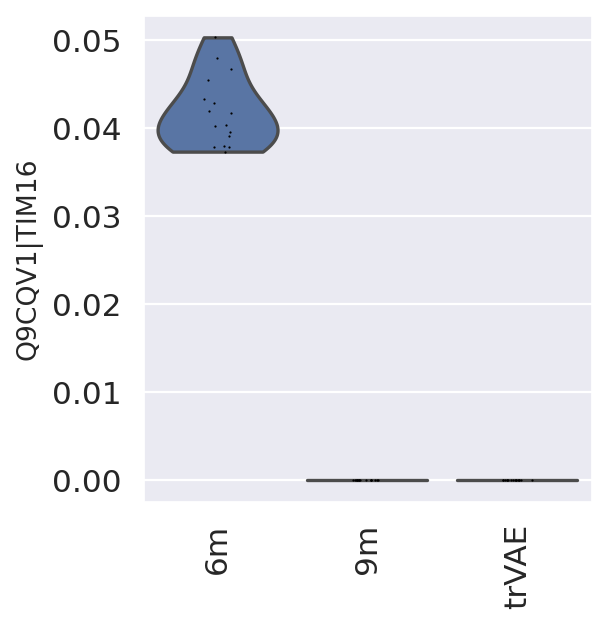

In [43]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_best_model_cmpr.pdf",
             jitter=True,
            )

In [44]:
protein_down = down_genes[0]
print(protein_down)

Q8K4Z5|SF3A1


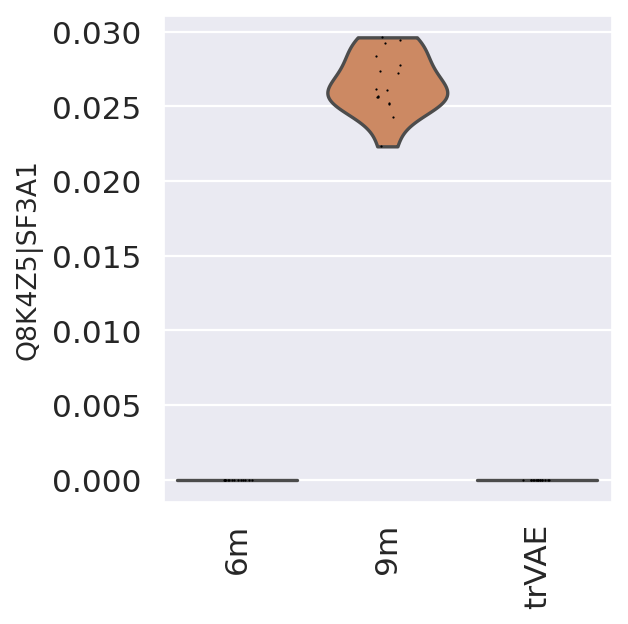

In [45]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_worst_model_cmpr.pdf",
             jitter=True,
            )

In [46]:
#top_genes = up_genes.tolist() + down_genes.tolist()

reg_mean_top100: 0.04367751909150108
reg_mean_all: 0.9413128946357217


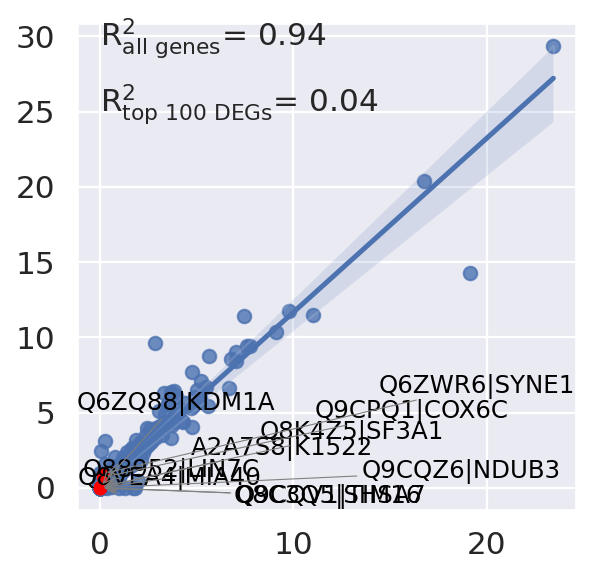

In [47]:
reptrvae.pl.reg_mean_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{'normalized' if normalized else 'count'}_{combination}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.7641229847474424
reg_var_all: 0.8794114754073679


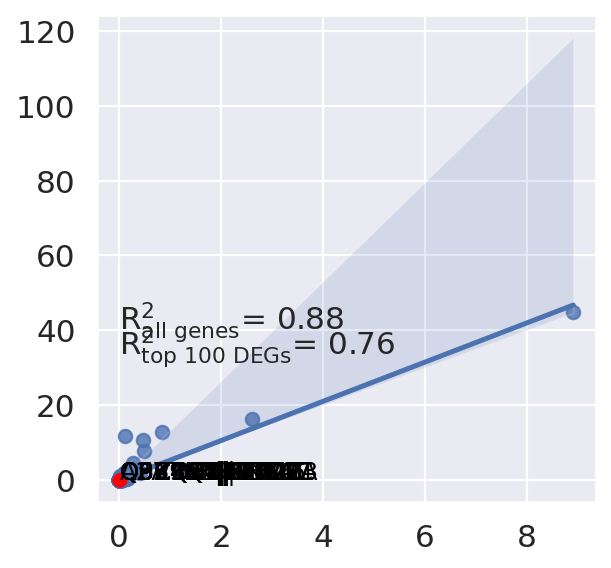

In [48]:
reptrvae.pl.reg_var_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{'normalized' if normalized else 'count'}_{combination}_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.1)

In [49]:
up_genes.tolist()

['Q9CQV1|TIM16',
 'Q8VEA4|MIA40',
 'Q9CQZ6|NDUB3',
 'O88952|LIN7C',
 'Q8C3Q5|SHSA7',
 'Q56A07|SCN2B',
 'Q01320|TOP2A',
 'P10854|H2B1M',
 'Q9D1K7|CT027',
 'Q8BGU5|CCNY',
 'A2ASS6|TITIN',
 'Q924K8|MTA3',
 'Q62167|DDX3X',
 'Q9QZR9|CO4A4',
 'Q8R0S2|IQEC1',
 'Q99J09|MEP50',
 'Q60973|RBBP7',
 'P15864|H12',
 'Q9CR98|F136A',
 'Q69ZT1|FAN1',
 'Q8BSS9|LIPA2',
 'Q99JR8|SMRD2',
 'Q8BHE3|ATCAY',
 'Q64337|SQSTM',
 'Q60960|IMA5',
 'Q9CQR4|ACO13',
 'Q8BH34|SEM3D',
 'Q8C120|SH3R3',
 'P97952|SCN1B',
 'Q62376|RU17',
 'Q99PJ0|NTRI',
 'Q9CQX8|RT36',
 'Q62189|SNRPA',
 'P48678|LMNA',
 'P63087|PP1G',
 'Q5DTJ9|MYPN',
 'P63073|IF4E',
 'Q9D4C9|CLVS1',
 'Q5EG47|AAPK1',
 'Q9JL04|FMN2',
 'Q8BJM7|TYW1',
 'Q6PHZ8|KCIP4',
 'Q14BB9|MA6D1',
 'Q9D6G9|CKLF5',
 'Q8K2K6|AGFG1',
 'Q9QZD9|EIF3I',
 'P13504|IL1R1',
 'Q6NZC7|S23IP',
 'Q8R3Q2|PP6R2',
 'Q3UHU5|MTCL1']

In [50]:
down_genes.tolist()

['Q8K4Z5|SF3A1',
 'Q6ZWR6|SYNE1',
 'Q9CPQ1|COX6C',
 'A2A7S8|K1522',
 'Q6ZQ88|KDM1A',
 'Q9DBL7|COASY',
 'P61759|PFD3',
 'Q0VF58|COJA1',
 'P62821|RAB1A',
 'Q8R5C5|ACTY',
 'Q62241|RU1C',
 'P61957|SUMO2',
 'P46664|PURA2',
 'Q8C878|UBA3',
 'Q8C6E0|CFA36',
 'Q6ZPE2|MTMR5',
 'Q62393|TPD52',
 'P27048|RSMB',
 'Q6ZWR4|2ABB',
 'P61082|UBC12',
 'P24452|CAPG',
 'Q9R0N7|SYT7',
 'Q9CZ04|CSN7A',
 'Q9R069|BCAM',
 'Q61410|KGP2',
 'P61961|UFM1',
 'Q9CRY7|GDPD1',
 'Q9D0G0|RT30',
 'Q61233|PLSL',
 'Q9CQ86|MIEN1',
 'O88448|KLC2',
 'P54728|RD23B',
 'Q9WVL0|MAAI',
 'Q8BHW2|OSCP1',
 'Q6ZPF4|FMNL3',
 'P62267|RS23',
 'P21126|UBL4A',
 'Q9D9M2|UBP12',
 'O55142|RL35A',
 'P84244|H33',
 'Q9Z2V5|HDAC6',
 'Q9D906|ATG7',
 'Q9QX60|DGUOK',
 'Q9Z1R2|BAG6',
 'Q8R2V5|ADAP2',
 'Q9JKK7|TMOD2',
 'Q52KR3|PRUN2',
 'P47955|RLA1',
 'Q99MR6|SRRT',
 'Q6ZQK5|ACAP2']